In [128]:
import pandas as pd
import numpy as np
df=pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [129]:
df=df[['v1','v2']]
df=df.rename(columns={'v1':'labels','v2':'text'})
df.head()

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [130]:
df=df.drop_duplicates()

In [131]:
df[df[['labels','text']].duplicated()==True]

,labels,text


In [132]:
import matplotlib as plt

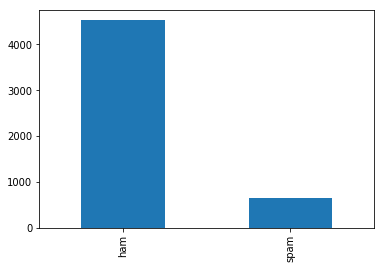

In [133]:
df.labels.value_counts().plot(kind='bar')

In [134]:
def review_message(msg):
    msg=msg.lower()
    return msg

In [135]:
df['text']=df['text'].apply(review_message)
df.head()

,labels,text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [136]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['labels'], test_size = 0.1, random_state = 1)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
x_train_vec=vectorizer.fit_transform(x_train)



## SVM

In [137]:
from sklearn import svm
from sklearn.metrics import accuracy_score

svm=svm.SVC(C=1000)
svm.fit(x_train_vec,y_train)

C:\Users\USER\Anaconda31\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [138]:
x_test=vectorizer.transform(x_test)
y_pred=svm.predict(x_test)
accuracy_score(y_test,y_pred)



0.9787234042553191

## Confusion matrix on SVM

In [139]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[462,   0],
       [ 11,  44]], dtype=int64)

## Classification Report on SVM

In [140]:
from sklearn.metrics import classification_report

class_rep=classification_report(y_test,y_pred)
print(class_rep)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       462
        spam       1.00      0.80      0.89        55

   micro avg       0.98      0.98      0.98       517
   macro avg       0.99      0.90      0.94       517
weighted avg       0.98      0.98      0.98       517



## Logistic regression 

In [141]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(x_train_vec,y_train)
lr_pred=logreg.predict(x_test)
print ("Accuracy Score :" ,accuracy_score(y_test,lr_pred))



C:\Users\USER\Anaconda31\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy Score : 0.9690522243713733


## confusion matrix for logistic model

In [142]:
print (confusion_matrix(y_test,lr_pred))

[[462   0]
 [ 16  39]]


## Classification Report for Logistic model

In [143]:
class_rep2=classification_report(y_test,lr_pred)
print(class_rep2)

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       462
        spam       1.00      0.71      0.83        55

   micro avg       0.97      0.97      0.97       517
   macro avg       0.98      0.85      0.91       517
weighted avg       0.97      0.97      0.97       517

